# END OF SECOND SEMESTER EXAMINATION - 2019/2020

#### CSCD 312 - INTRODUCTION TO ARTIFICIAL INTELLIGENCE

#### ID: 10687108
#### NAME: KOBIRI SOLOMON OWUSU

#### PROJECT TITLE: WINE QUALITY PREDICTION BASED ON IT'S CHEMICAL COMPONENTS  (QUESTION 1.A)

## OVERVIEW
This work seeks to analyze data based on the chemical properties of a number of wines and creates different machine learning models to predict the quality of each wine and subsequent ones.It is a well-established fact that the age of a wine makes it better and numerous factors determine the quality certification of each wine, including physiochemical tests such as alcohol quantity, pH, density and a lot more that would be analyzed in this work.


### MACHINE LEARNING ALGORITHM
The main type of machine learning algorith used in this work is Supervised Learning. This is where a target or outcome variable(which is wine quality in our case) is to be predicted from a given set of predictions(independent variables). The examples of supervised learning algorithms in this work are:
1. SUPPORT VECTOR MACHINE (SVM)
2. RANDOM FOREST
3. K-NEAREST NEIGHBOR (KNN)
4. DECISION TREE
5. NEURAL NETWORKS

The performances of each model will be analyzed and the results discussed. Comparisons will also be drawn if the need arises.


### MODULES AND PACKAGES USED
The main machine learning library used is python's SCIKIT-LEARN, commonly known as sklearn. Other packages used are the pandas Framework for retrieving the data file and converting it to tabular form for easy manipulation, seaborn and matplotlib for visualizing the data as well as other sklearn modules and packages.

### DATA
The data(winequality-white.csv) for this work was taken from the UCI public repository website (https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The details are described in Cortez et al., 2009. The period for the collection of the data was from May 2004 to February 2007. The description of the wine features can be found below:
1. Fixed acidity: Acids in the wine that does not evaporate easily
2. Volatile acidity: Unlike fixed acidity, this type of acid in wine evaporates easily
3. Citric acid: This is the type of acid mostly derived from citric fruits for added flavor to the wine
4. Residual sugar: This refers to the sugar content of the wine after fermentation
5. Chlorides: This is the salt content of the wine.
6. Free sulfur dioxide: Free Sulfur dioxide is SO2 which is free in the wine
7. Total sulfur dioxide: This refers to the sum of both free and bound SO2 content in the wine
8. Density: This is the ratio of the mass of the wine to it's volume.
9. pH: This is the description of how acidic or basic the wine is.
10. Sulphates: An additive acting as an antioxidant and has the possibility of influencing SO2 content
11. Alcohol: The percent of alcohol content in the wine
12. Quality: This is the target variable in our work. It is given a score based on the available chemical properties of the wine

### NB: 
#### The work is appropriately commented where necessary.

In [1]:
# Importing necessary libraries and packages for this work

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
# Reading the content of the dataset into a pandas dataframe

whiteWine = pd.read_csv('E:/L300 SECOND SEM/CSCD 312 - INTRO TO ARTIFICIAL INTELLIGENCE/winequality-white.csv')

In [3]:
# Viewing the head(first few rows) of the dataset

whiteWine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [4]:
# The values in the dataset are not appropriately aligned with their respective labels as shown above. 
# It is rectified with the code below using the pandas 'seperator(sep)' porameter.

Wine = pd.read_csv('E:/L300 SECOND SEM/CSCD 312 - INTRO TO ARTIFICIAL INTELLIGENCE/winequality-white.csv', sep=';')

In [5]:
# View the head of the new pandas dataset

Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# View the tail(the last few rows) of the new pandas dataset

Wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
# Checking for null values in dataset

Wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## DATA VISUALIZATION AND PREPROCESSING

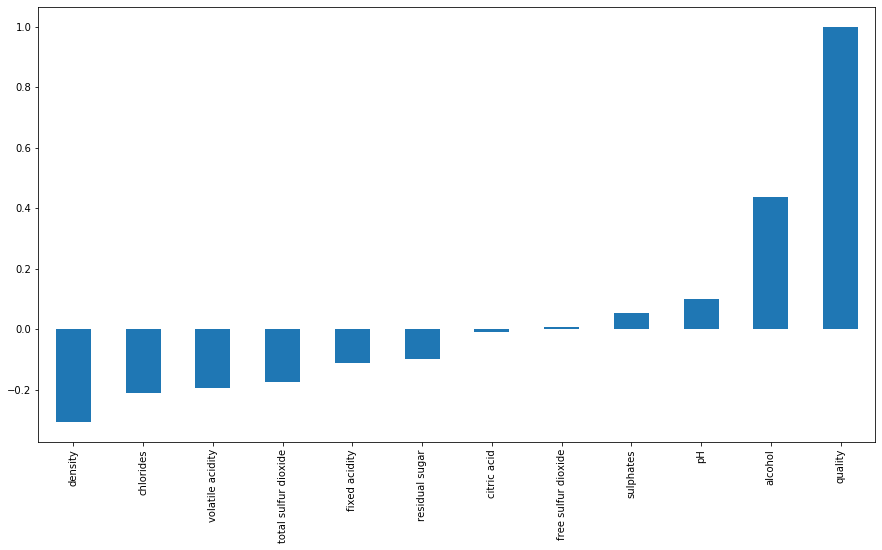

In [8]:
# Examining the correlation between the dependent variable(wine quality) and the 
# other independent variables

# As shown below in the graph below, citric acid, sulfur dioxides and sulphates have little or no
# correlation on the quality of wine. Alcohol, density, chlorides and volatile acidity influence
# wine quality.

Wine.corr()['quality'].sort_values().plot(kind='bar', figsize=(15, 8))

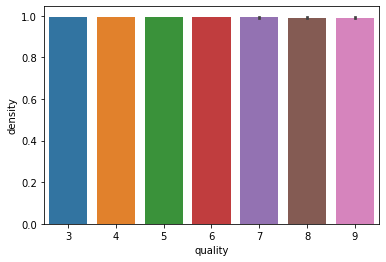

In [9]:
#A graph of the relationship between quality and density

sns.barplot(x='quality', y='density', data=Wine)

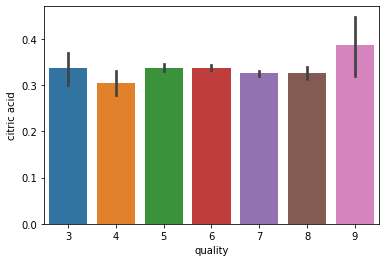

In [10]:
#A graph of the relationship between quality and citric acid

sns.barplot(x='quality', y='citric acid', data=Wine)

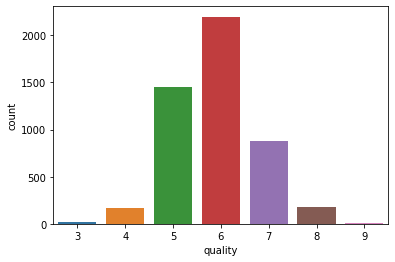

In [11]:
#Graph of wine quality number and their respective quantity

sns.countplot(Wine['quality'])

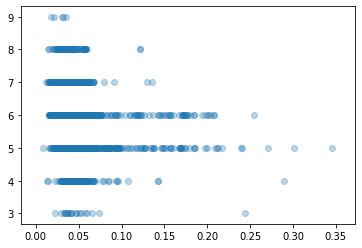

In [12]:
# Scatter plot between chlorides and quality

plt.scatter(Wine['chlorides'], Wine['quality'], alpha=0.3)

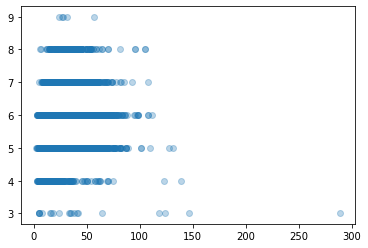

In [13]:
# Scatter plot between free sulfur dioxide and quality

plt.scatter(Wine['free sulfur dioxide'], Wine['quality'], alpha=0.3)

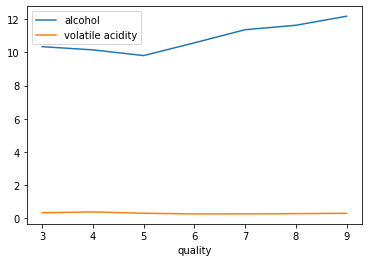

In [14]:
# Plot alcohol and volatile acidity on the same plot to examine their influence on wine quality.

ax = Wine.groupby('quality').mean().reset_index().plot(y='alcohol', x='quality')
Wine.groupby('quality').mean().reset_index().plot(y='volatile acidity', x='quality', ax=ax)

In [15]:
#For the sake of classification, the wine is separated into two categories.

bins = (2,6,9 )     # Quality wine has quality value of 6 or higher (more than average quality number)
categories = ['bad', 'good']      #Names of the two categories
Wine['quality'] = pd.cut(Wine['quality'], bins = bins, labels = categories)
Wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [16]:
#Use LabelEncoder to indicate 'bad = 0' and 'good = 1'

quality_label = LabelEncoder()
Wine['quality'] = quality_label.fit_transform(Wine['quality'])

In [17]:
#View the head of the Wine table to determine if the 'quality' label has been encoded with binary values

Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


0    3838
1    1060
Name: quality, dtype: int64

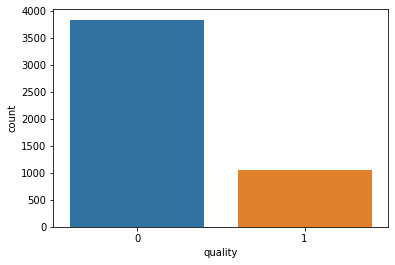

In [18]:
# A visualization of the number of good wine and bad wine.

sns.countplot(Wine['quality'])
Wine['quality'].value_counts()

In [19]:
# Separation of wine features to enhance prediction

X = Wine.drop('quality', axis=1)
y = Wine['quality']

### DATA SPLITTING FOR TRAINING AND VALIDATION

In [20]:
# Splitting data into train and test components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Scaling down all the values in the labels to obtain optimum result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train[ : 5]

array([[ 5.15119310e-01, -1.07623315e+00,  2.27730764e-01,
         3.40419470e-01, -8.13688488e-01,  5.34064605e-01,
        -6.41932319e-01, -4.47040725e-01, -3.28261014e-01,
        -7.02444738e-01,  1.54037099e+00],
       [-6.69188091e-01, -2.88776731e-01,  8.95831948e-01,
         1.00207124e+00, -2.17211567e-01,  7.73947112e-01,
         1.35510550e+00,  9.03369755e-01, -6.18856911e-02,
         2.66074147e-01, -8.21711966e-01],
       [-1.49820327e+00,  4.00247639e-01, -2.28071805e-02,
         1.84736700e-01, -4.00742927e-01, -6.05377303e-01,
        -1.02232048e+00, -4.60280044e-01,  4.04271124e-01,
         1.93263316e-03,  4.81506217e-01],
       [ 4.13963498e-02, -8.79369048e-01,  1.44218115e-01,
        -9.24503038e-01, -4.46625767e-01, -1.25612289e-01,
        -8.79674917e-01, -3.04718052e-01,  1.37895801e-01,
         4.42168490e-01,  2.37152807e-01],
       [ 9.88842271e-01,  2.03383533e-01, -6.07395717e-01,
         2.43240669e+00,  3.33382515e-01,  5.42995912e-02,
  

### SUPPORT VECTOR MACHINE (SVM) CLASSIFIER
This is a type of supervised learning classifier that adopts hyperplanes to marginalize data points.It can easily handle multiple categorical and continuos data values hence it is adopted in both types of classification and regression problems. It is popularly known for its kernel tricks

In [23]:
# Building SVM model

svModel = svm.SVC()
svModel.fit(X_train, y_train)
svprediction = svModel.predict(X_test)

In [24]:
# Checking for the performance of the support vector machine model

print(classification_report(y_test, svprediction))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980



In [25]:
# Plotting the confusion matrix to view the model performance

print(confusion_matrix(y_test, svprediction))

#Plo

[[728  25]
 [150  77]]


#### DISCUSSION OF SVM RESULT
The capacity of the model to predict bad wine is at a precision rate of 83% and that of a good wine is
at a precision rate of 75% with f1 scores of 89% and 47% respectively.
Though the model did not give a considerable precision percentage, it was able to classify more of the
wines as well as most of the good wines while missing out on a few. It can be considered as a
moderate model

### RANDOM FOREST CLASSIFIER MODEL
It is considered the most flexible supervised learning algorithm used both for classification and regression. A forest is made of trees and the more trees the forest has the more robust it becomes. The random forest algorithm creates decision trees on selected data samples and make a prediction from each tree and then select the best solution by means of voting

In [26]:
# Building  Random forest model

rfModel = RandomForestClassifier(n_estimators = 1000)
rfModel.fit(X_train, y_train)
rfprediction = rfModel.predict(X_test)

In [27]:
# Viewing the first 30 rows of the predicted quality column

rfprediction[:30]

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [28]:
# Checking for the performance of the random forest model

print(classification_report(y_test, rfprediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       753
           1       0.85      0.65      0.74       227

    accuracy                           0.89       980
   macro avg       0.88      0.81      0.84       980
weighted avg       0.89      0.89      0.89       980



In [30]:
# Plotting the confusion matrix to view the model performance

print(confusion_matrix(y_test, rfprediction))

[[727  26]
 [ 79 148]]


#### DISCUSSION OF RANDOM FOREST CLASSIFIER RESULT
With a precision of 90% for predicting bad wine and 85% for predicting good wine, the model can 
be considered as fair. The classification_report method also shows the f1-score of the model.

The precision percentages above are confirmed through the confusion matrix where the model accurately 
predicted a higher number of bad wines(727) than it could predict good wines(79). Hence this model is 
really good at predicting bad wine.

### K-Nearest Neighbors (KNN) CLASSIFIER MODEL
This algorithm can be used for both classification and regression predictive problems. KNN is described as a lazy learning algorithm and a non-parametric learning algorithm. It uses feature similarities for the prediction of values of new data points. It is a versatile algorithm and produces a relatively high accuracy but is slow on large datasets and is very sensitive to the scale of data as well as irrelevant features.

In [31]:
# Building KNN model
knnModel = KNeighborsClassifier(n_neighbors = 1)
knnModel.fit(X_train, y_train)
knnprediction = knnModel.predict(X_test)

In [32]:
# Checking for the performance of the KNN model

print(classification_report(y_test, knnprediction))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       753
           1       0.69      0.72      0.71       227

    accuracy                           0.86       980
   macro avg       0.80      0.81      0.81       980
weighted avg       0.86      0.86      0.86       980



In [33]:
# Plotting the confusion matrix to view the model performance

print(confusion_matrix(y_test, knnprediction))

[[681  72]
 [ 64 163]]


#### DISCUSSION OF KNN RESULT
The KNN model has shown a high order of precision with respect to the classification of bad wine(91%).The precision for the classification of good wine(69%) is quite poor but the weighted average precision score of 86% is fairly commendable.
The confusion matrix illustrates the models ability to classify a large number of bad wines and shows it's inability to classify the good wines.

### THE DECISION TREE CLASSIFIER MODEL
This is a type of supervised machine learning algorithm which involves the continuous splitting of data according to a certain parameter. A decision tree consists of Nodes, Edges/Branch and Leaf nodes. The main types are classification trees and regression trees.

In [34]:
# Building the Decision tree classifier model

dtreeModel = DecisionTreeClassifier(random_state = 50)
dtreeModel.fit(X_train, y_train)
dtreeprediction = dtreeModel.predict(X_test)

In [35]:
# Checking for the performance of the Decision Tree model

print(classification_report(y_test, dtreeprediction))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       753
           1       0.63      0.67      0.65       227

    accuracy                           0.83       980
   macro avg       0.76      0.77      0.77       980
weighted avg       0.83      0.83      0.83       980



In [36]:
# Plotting the confusion matrix to view the model performance

print(confusion_matrix(y_test, dtreeprediction))

[[663  90]
 [ 76 151]]


#### DISCUSSION OF DECISION TREE CLASSIFIER RESULT
The decision tree classifier model can be considered substantial for the prediction of bad wine as the precision level is higher for the bad wines than for the good ones. 
The confusion matrix shows an indication of the models' inaccuracy in classifying rightly most of the wines, especially the good ones.

### NEURAL NETWORKS (GOOD WITH HUGE AMOUNTS OF DATA)
This type of classifier uses algorithms that emulates the functionality of the human brain by recognizing patterns and making decisions. Neural networks are used in supervised and unsupervised learning scenarios. In supervised learning, it is used when the output is already known, hence it learns from the input data to make better predictions for subsequent data inputs.

In [37]:
neuralModel = MLPClassifier(hidden_layer_sizes=(22,22,22), max_iter=2500)
neuralModel.fit(X_train, y_train)
neuralprediction = neuralModel.predict(X_test)

In [38]:
# Checking for the performance of the neural network model

print(classification_report(y_test, neuralprediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       753
           1       0.69      0.68      0.68       227

    accuracy                           0.86       980
   macro avg       0.80      0.79      0.80       980
weighted avg       0.85      0.86      0.85       980



In [39]:
# Plotting the confusion matrix to view the model performance

print(confusion_matrix(y_test, neuralprediction))

[[684  69]
 [ 73 154]]


#### DISCUSSION OF NEURAL NETWORK CLASSIFIER RESULT
Having three layers with twenty-two (22) neurons at each layer(being double the number of independent features in the dataset), the weighted average prediction precision of this model is 85%.This precision level is below standard especially for industrial purposes.
The confusion matrix also exposes the inability of the model to properly classify the different types of wine into their respective segments.

### EVALUATION OF THE ACCURACY OF MODELS

In [40]:
# Getting Accuracy scores for each prediction

svmAccuracy = accuracy_score(y_test, svprediction)
rfAccuracy = accuracy_score(y_test, rfprediction)
knnAccuracy = accuracy_score(y_test, knnprediction)
dtreeAccuracy = accuracy_score(y_test, dtreeprediction)
neuralAccuracy = accuracy_score(y_test, neuralprediction)


In [41]:
# Printing Accuracy scores for each prediction

print("SVM Accuracy score = ", svmAccuracy)
print("Random Forest Accuracy score = ", rfAccuracy)
print("KNN Accuracy score = ", knnAccuracy)
print("Decision Tree Accuracy score = ", dtreeAccuracy)
print("Neural Networks Accuracy score = ", neuralAccuracy)

SVM Accuracy score =  0.8214285714285714
Random Forest Accuracy score =  0.8928571428571429
KNN Accuracy score =  0.8612244897959184
Decision Tree Accuracy score =  0.8306122448979592
Neural Networks Accuracy score =  0.8551020408163266


## CONCLUSION

From the accuracy scores above, it can be observed that the Random Forest Classifier yielded the highest accuracy with a prediction accuracy rate of nearly 90%. The K Nearest Neighbour (KNN) classifier model yielded the second highest accuracy score of 86%. The Decision Tree classifier and the Neural Networks yielded 83% and 85% respectively. The Support Vector Machine (SVM) had the least accuracy score of 82%. This is an indication of the fact that the Random Forest Classifier is thus far the best model for predicting the quality of each wine in the wine dataset.
Also, it portrays the KNN and Neural Networks as having similar predictive power.

The results of this work can be helpful in the industrial production of quality wine by studying the effects of each chemical composition on the wine. Many wine managers would also find it much helpful as it can help them identify factors that influence wine quality and know how to price their wines as well as determine features of a wine that is classified as good by a particular group or society.

Although the Random Forest Model yielded a better accuracy score than the other classifier models, the use of rigor analytical tools and further analysis can help improve upon this work. Spending more time on data cleaning can be a useful factor in improving the accuracy scores of the models.